**Project Objective**: Utilize a Clustering Algorithm to Segment Credit Card Customers, analyze each cluster, and develop efficient marketing strategies based on the analysis.

**Project Description**: Utilize a sample dataset comprising the recent 6-month usage behavior of approximately 9000 active credit card holders. The dataset is structured at the customer level and encompasses 18 behavioral variables.

**Data Source**: https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

**Project Collaborator**: Sewon Hong

# Data Import and Preprocessing

In [ ]:
# Import the relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
# Importing the dataset

data = pd.read_csv('/content/sample_data/CC GENERAL.csv')

In [ ]:
# Quick overview of our dataset

data.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
# Dataset has 8950 rows and 18 features

data.shape

(8950, 18)

In [ ]:
# Some features have null-values ('CREDIT_LIMIT', 'MINIMUM_PAYMENTS')
# Those values have to be taken care of before building a ML model for better performance.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
# By looking at the quick statistics, we can get insights about the dataset.

data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


1. The average balance across 8950 customers are approximately $1564, reflecting the typical credit amount held in their accounts.

2. People tend to update their balance very often by approximately 88%.

3. The average purchase amount is about $1000 across all the customers.

4. Average single-time purchase by customers is $592, showing occasional substantial purchase behavior.

5. Installment-based purchases, averaging around $411, represent a significant portion of customer spending (40%).

In [ ]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
# No duplicated rows

data.duplicated().sum()

0

In [ ]:
# Since we have relatively few number of rows for 'MINIMUM_PAYMENTS', just fill those rows with median values.

data['MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].median())

In [ ]:
# Here, single row with null-values in 'CREDIT_LIMIT' is just dropped since it does not affect our analysis that much.

data.dropna(inplace=True)
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [ ]:
# Also, 'CUST_ID' is non necessary for analysis since it has nothing important in its value.

data.drop(columns='CUST_ID', inplace=True)

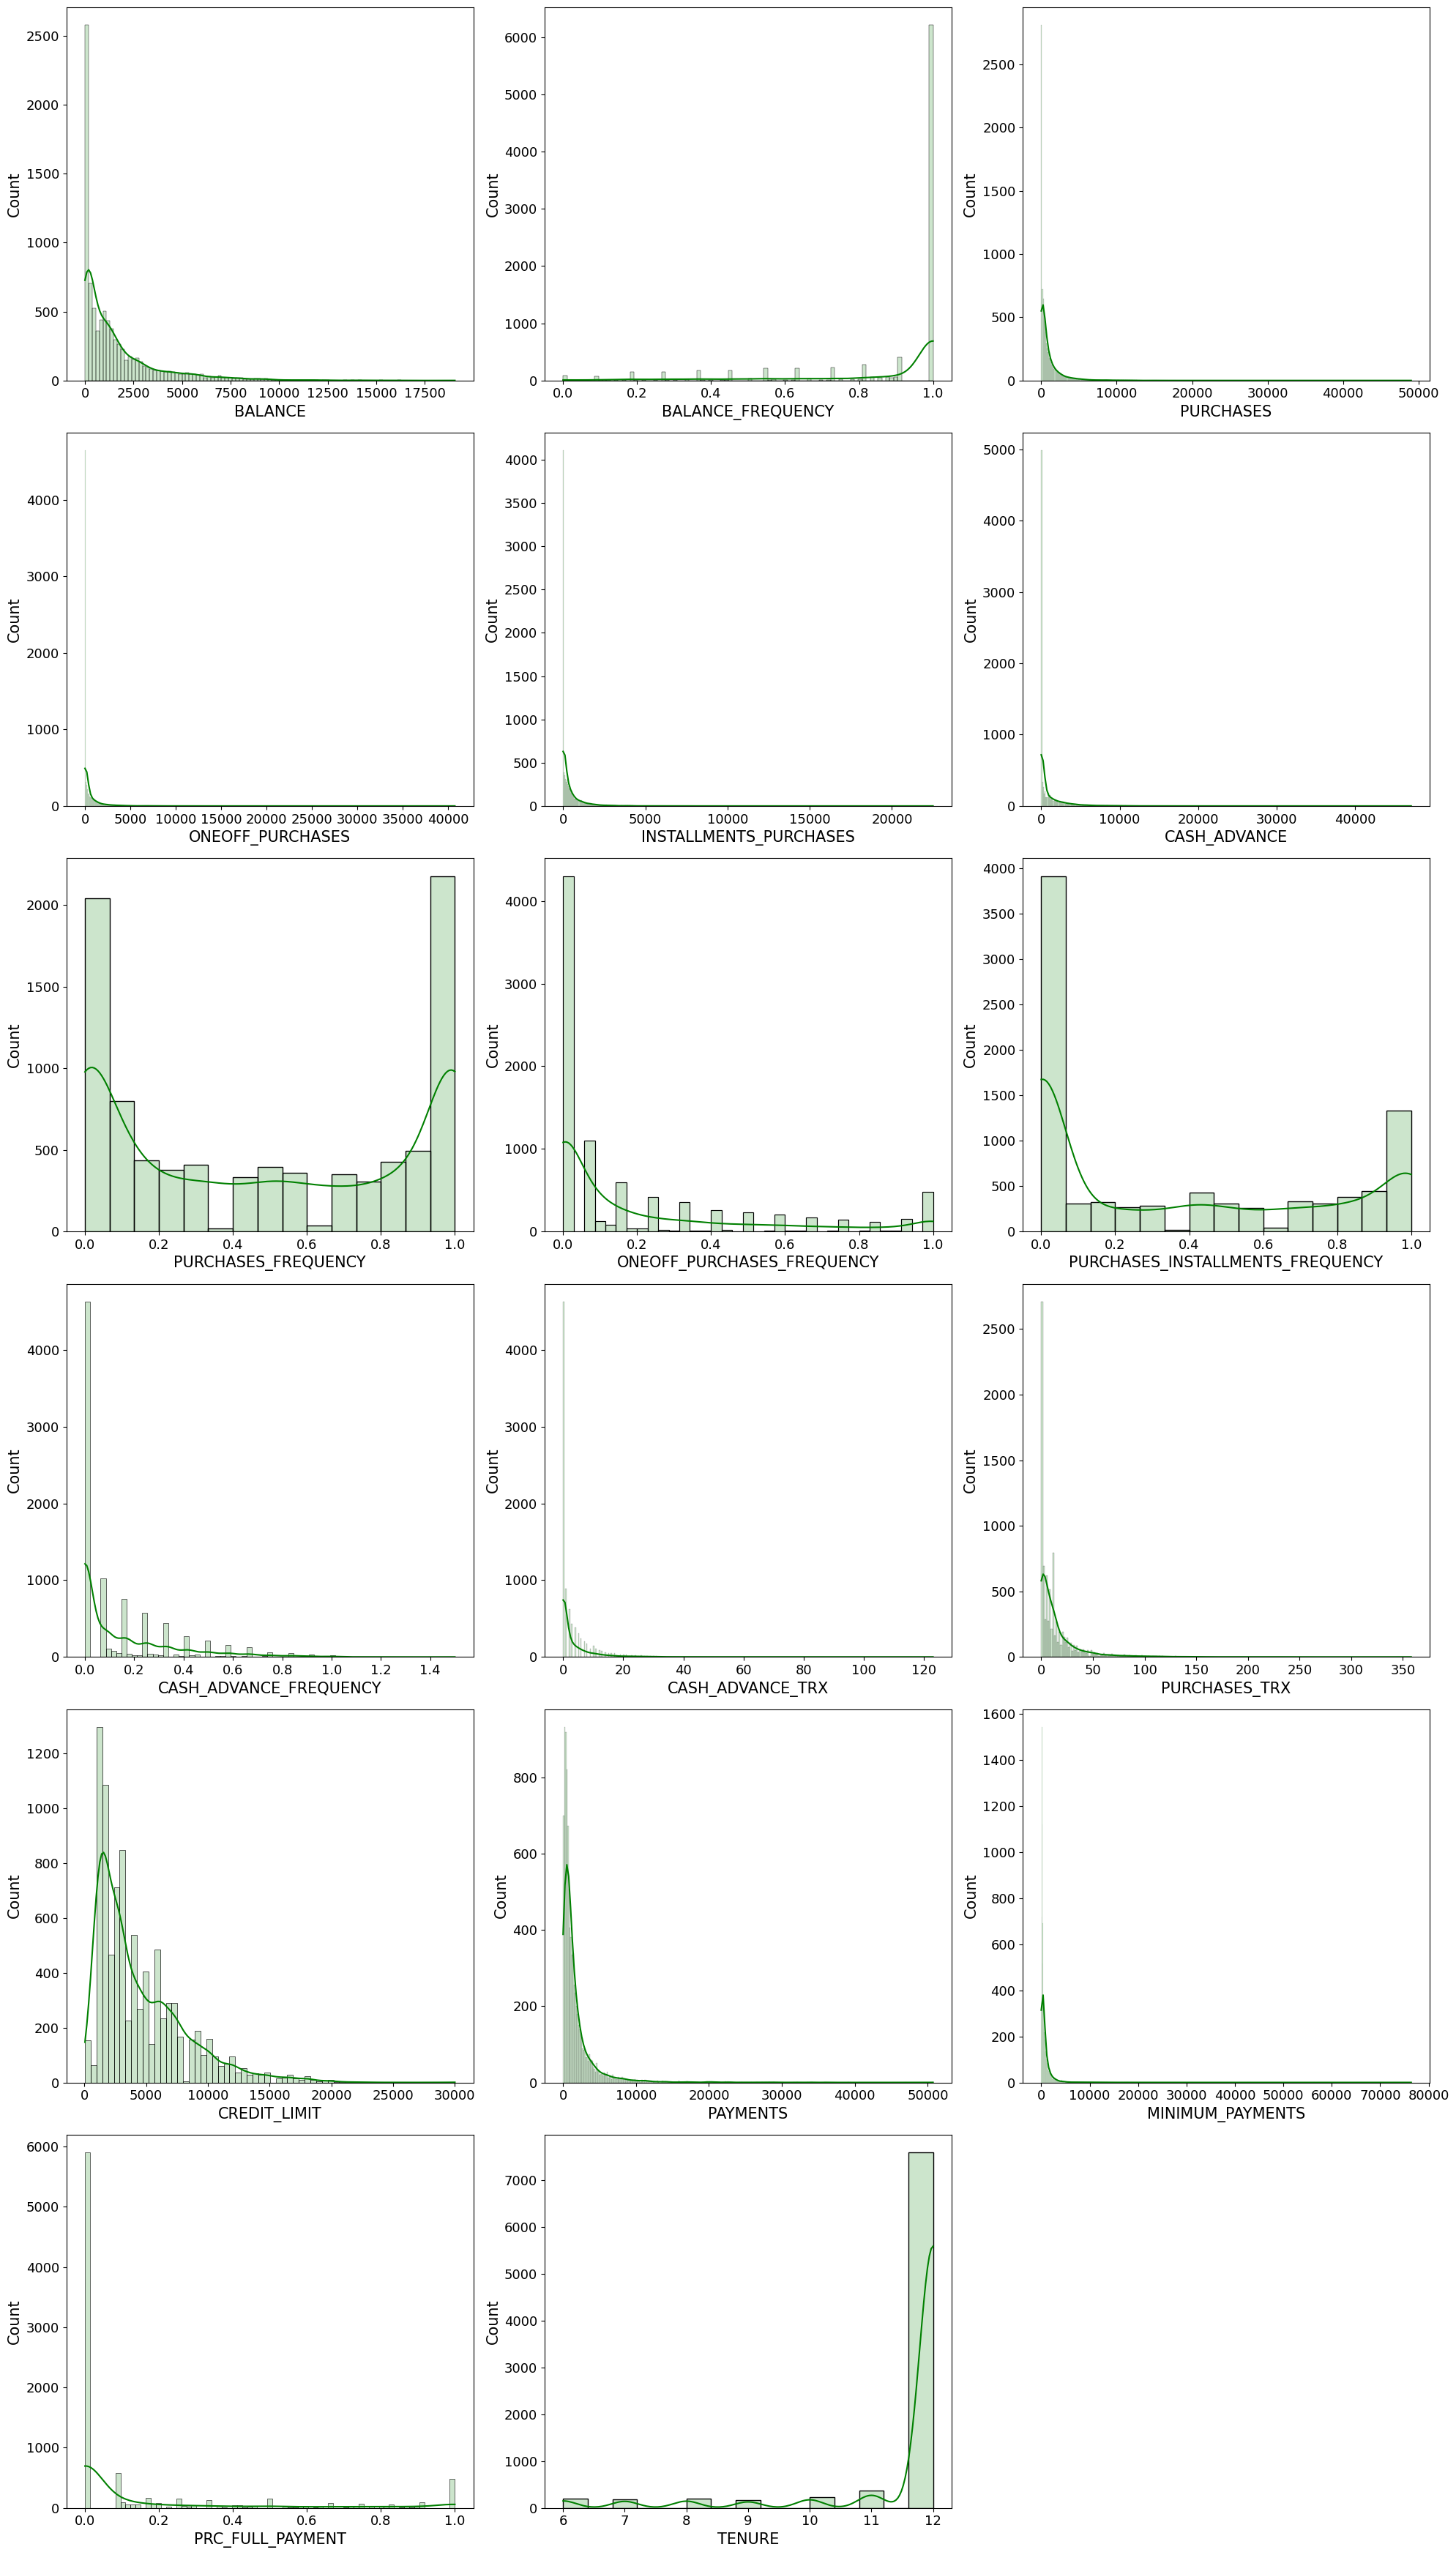

In [ ]:
# This histograms are made to see the overview of each feature's distribution.
# Most of the distribution is right skewed (this should be fixed to have normal distribution)
# since K-means algorithm assume that the data is normally distributed or at least symmetric.

fig = plt.figure(figsize = (20,35))

for i, col in enumerate(data.columns):
  ax = plt.subplot(6, 3, i+1)
  sns.histplot(data, x = col, ax = ax, color = 'green', kde = True, alpha = 0.2)
  plt.xlabel(col, fontsize = 15)
  plt.ylabel("Count", fontsize = 15)
  plt.xticks(fontsize = 13)
  plt.yticks(fontsize = 13)
plt.tight_layout()
fig.show()

## Now generate box plots for each features to see the outliers

* Using the Interquartile Range (IQR) method to identify and potentially remove outliers is a common preprocessing step in data analysis, including before building machine learning models. Outliers can skew statistical analyses and model predictions, leading to inaccurate results. Therefore, it's often beneficial to address outliers before proceeding with model building

In [ ]:
columns_list = data.columns.tolist()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'BALANCE'),
  Text(1, 0, 'BALANCE_FREQUENCY'),
  Text(2, 0, 'PURCHASES'),
  Text(3, 0, 'ONEOFF_PURCHASES'),
  Text(4, 0, 'INSTALLMENTS_PURCHASES'),
  Text(5, 0, 'CASH_ADVANCE'),
  Text(6, 0, 'PURCHASES_FREQUENCY'),
  Text(7, 0, 'ONEOFF_PURCHASES_FREQUENCY'),
  Text(8, 0, 'PURCHASES_INSTALLMENTS_FREQUENCY'),
  Text(9, 0, 'CASH_ADVANCE_FREQUENCY'),
  Text(10, 0, 'CASH_ADVANCE_TRX'),
  Text(11, 0, 'PURCHASES_TRX'),
  Text(12, 0, 'CREDIT_LIMIT'),
  Text(13, 0, 'PAYMENTS'),
  Text(14, 0, 'MINIMUM_PAYMENTS'),
  Text(15, 0, 'PRC_FULL_PAYMENT'),
  Text(16, 0, 'TENURE')])

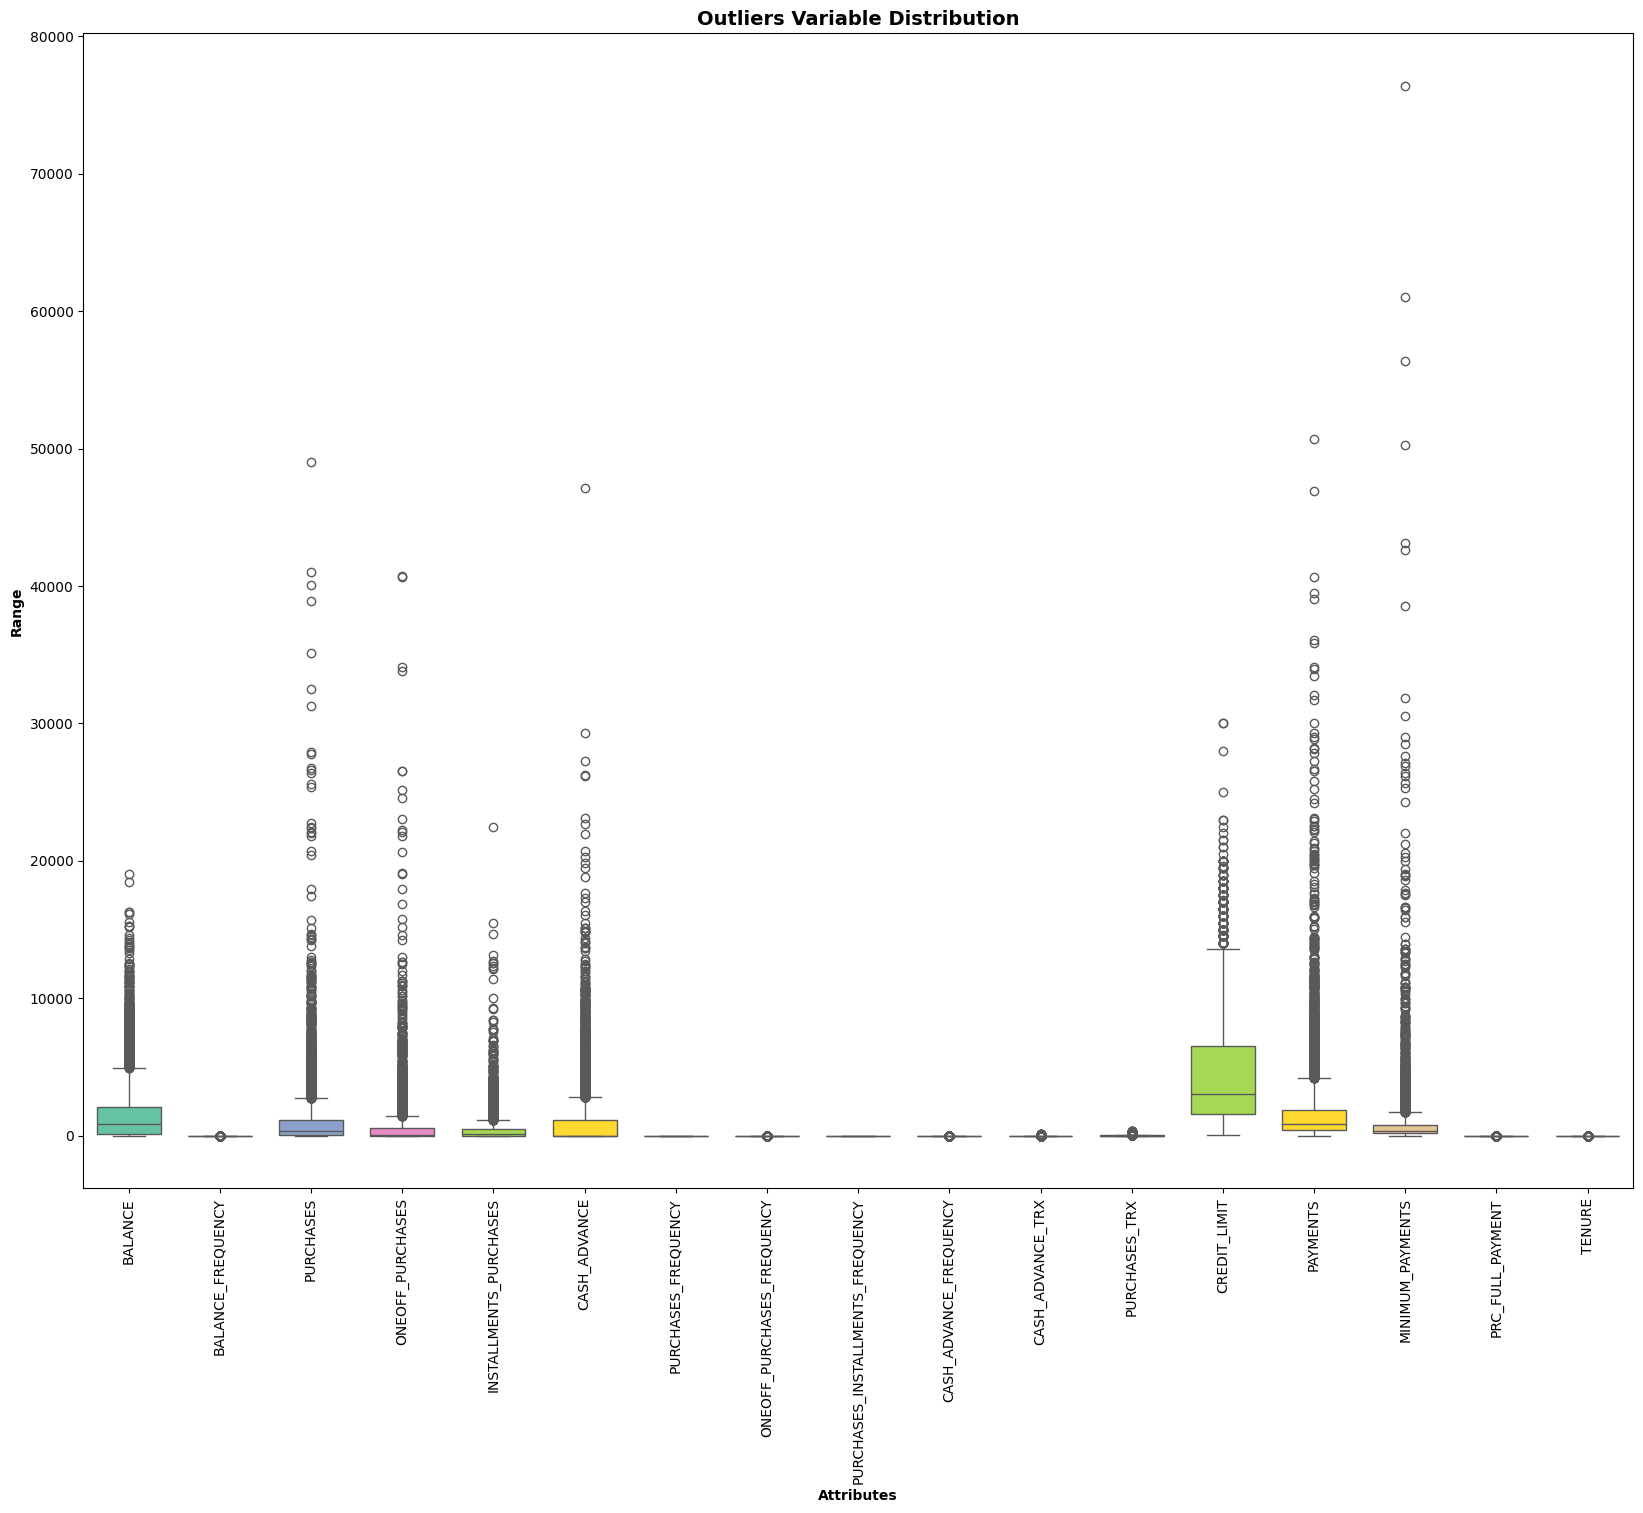

In [ ]:
plt.rcParams['figure.figsize'] = [20,15]

sns.boxplot(data=data[columns_list], orient='v', palette='Set2', whis=1.5, saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')
plt.xticks(rotation=90)

In [ ]:
# Now, we have only 8588 rows after getting rid of extreme outliers filtered by IQR method.

columns_to_process = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']

for column in columns_to_process:
    Q1 = data[column].quantile(0.05)
    Q3 = data[column].quantile(0.95)
    IQR = Q3 - Q1
    data = data[(data[column] >= Q1 - 1.5*IQR) & (data[column] <= Q3 + 1.5*IQR)]

data.shape

(8588, 17)

## By looking at the heatmap, we can see how different features are correlated with each other.

1. People who frequently make many purchases often also tend to make numerous installment payments.
2. People with higher balances tend to have larger advance cash rate.
3. Customers with higher balances tend to have higher minimum payments

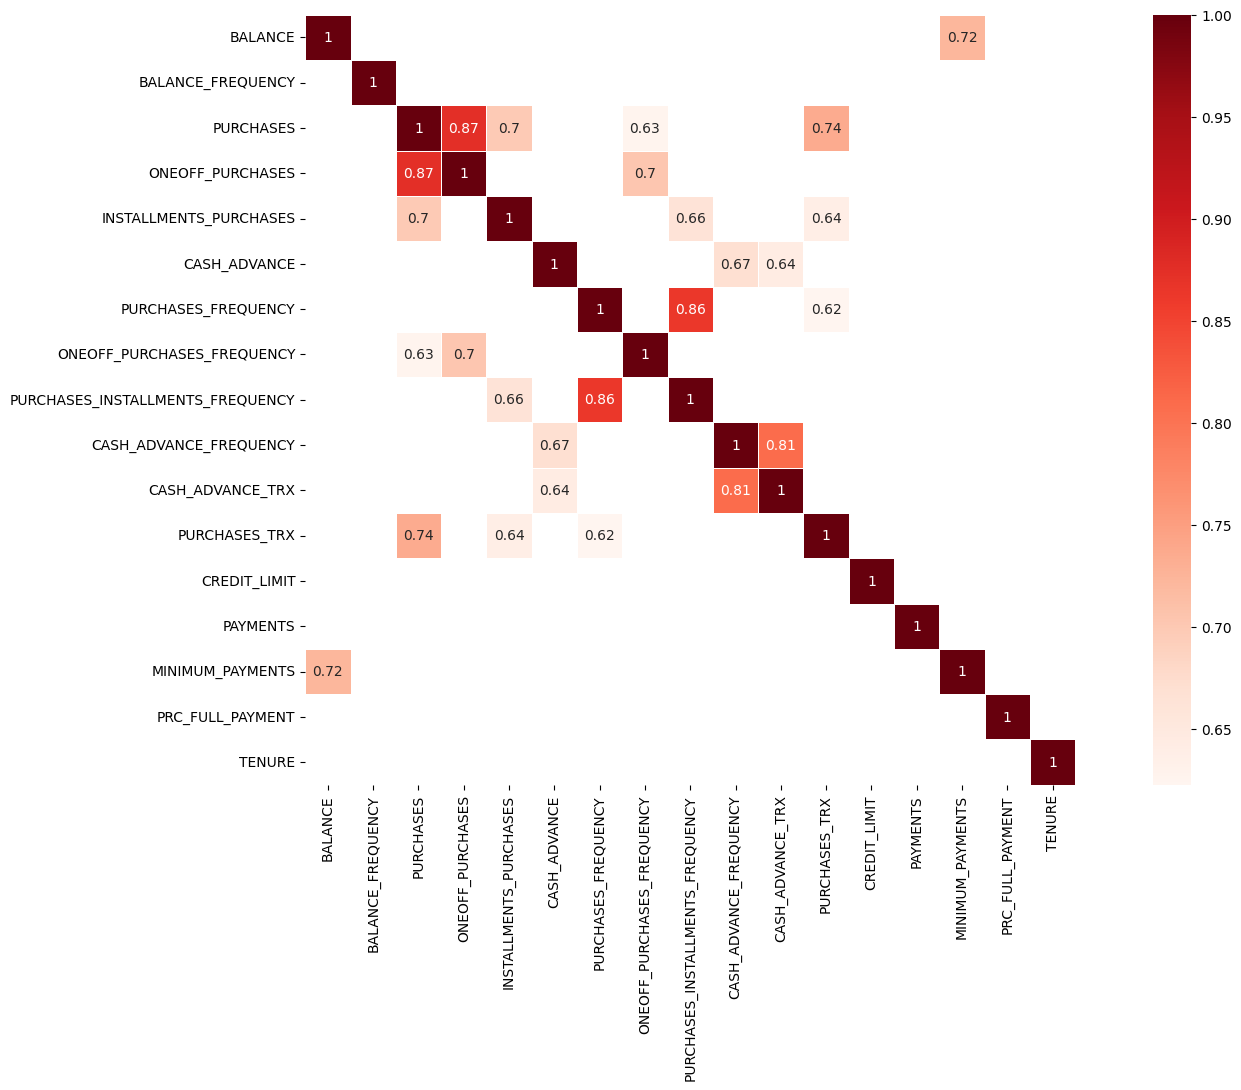

In [ ]:
# Showing only highly correlated (>0.6) feature relationships

corr_matrix = data.corr()
mask = np.abs(corr_matrix) < 0.6
fig = plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, cmap='Reds', square=True, annot=True, linewidths=0.5, mask=mask)
plt.show()

In [ ]:
# Filtering the columns that need to be normalized

cols = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']

### Reasons for applying Normalization (Sqrt)
**Reduce Skewness**: It can help in reducing the skewness of positively skewed data, making the distribution more symmetric and closer to a normal distribution. This is particularly beneficial because many algorithms, including K-means, assume that the data is normally distributed or at least symmetric.

**Handle Outliers**: Applying a square root transformation can also mitigate the effect of outliers since it reduces the range and variability of higher values more than lower values.

**Scaling**: It provides a form of scaling that can be more appropriate for certain data distributions than standard scaling methods like Min-Max scaling or Z-score normalization.

In [ ]:
# Function for Normalization

def feature_engi(column):
  column = np.sqrt(column)
  return column

In [ ]:
for col in cols:
  data[col] = feature_engi(data[col])

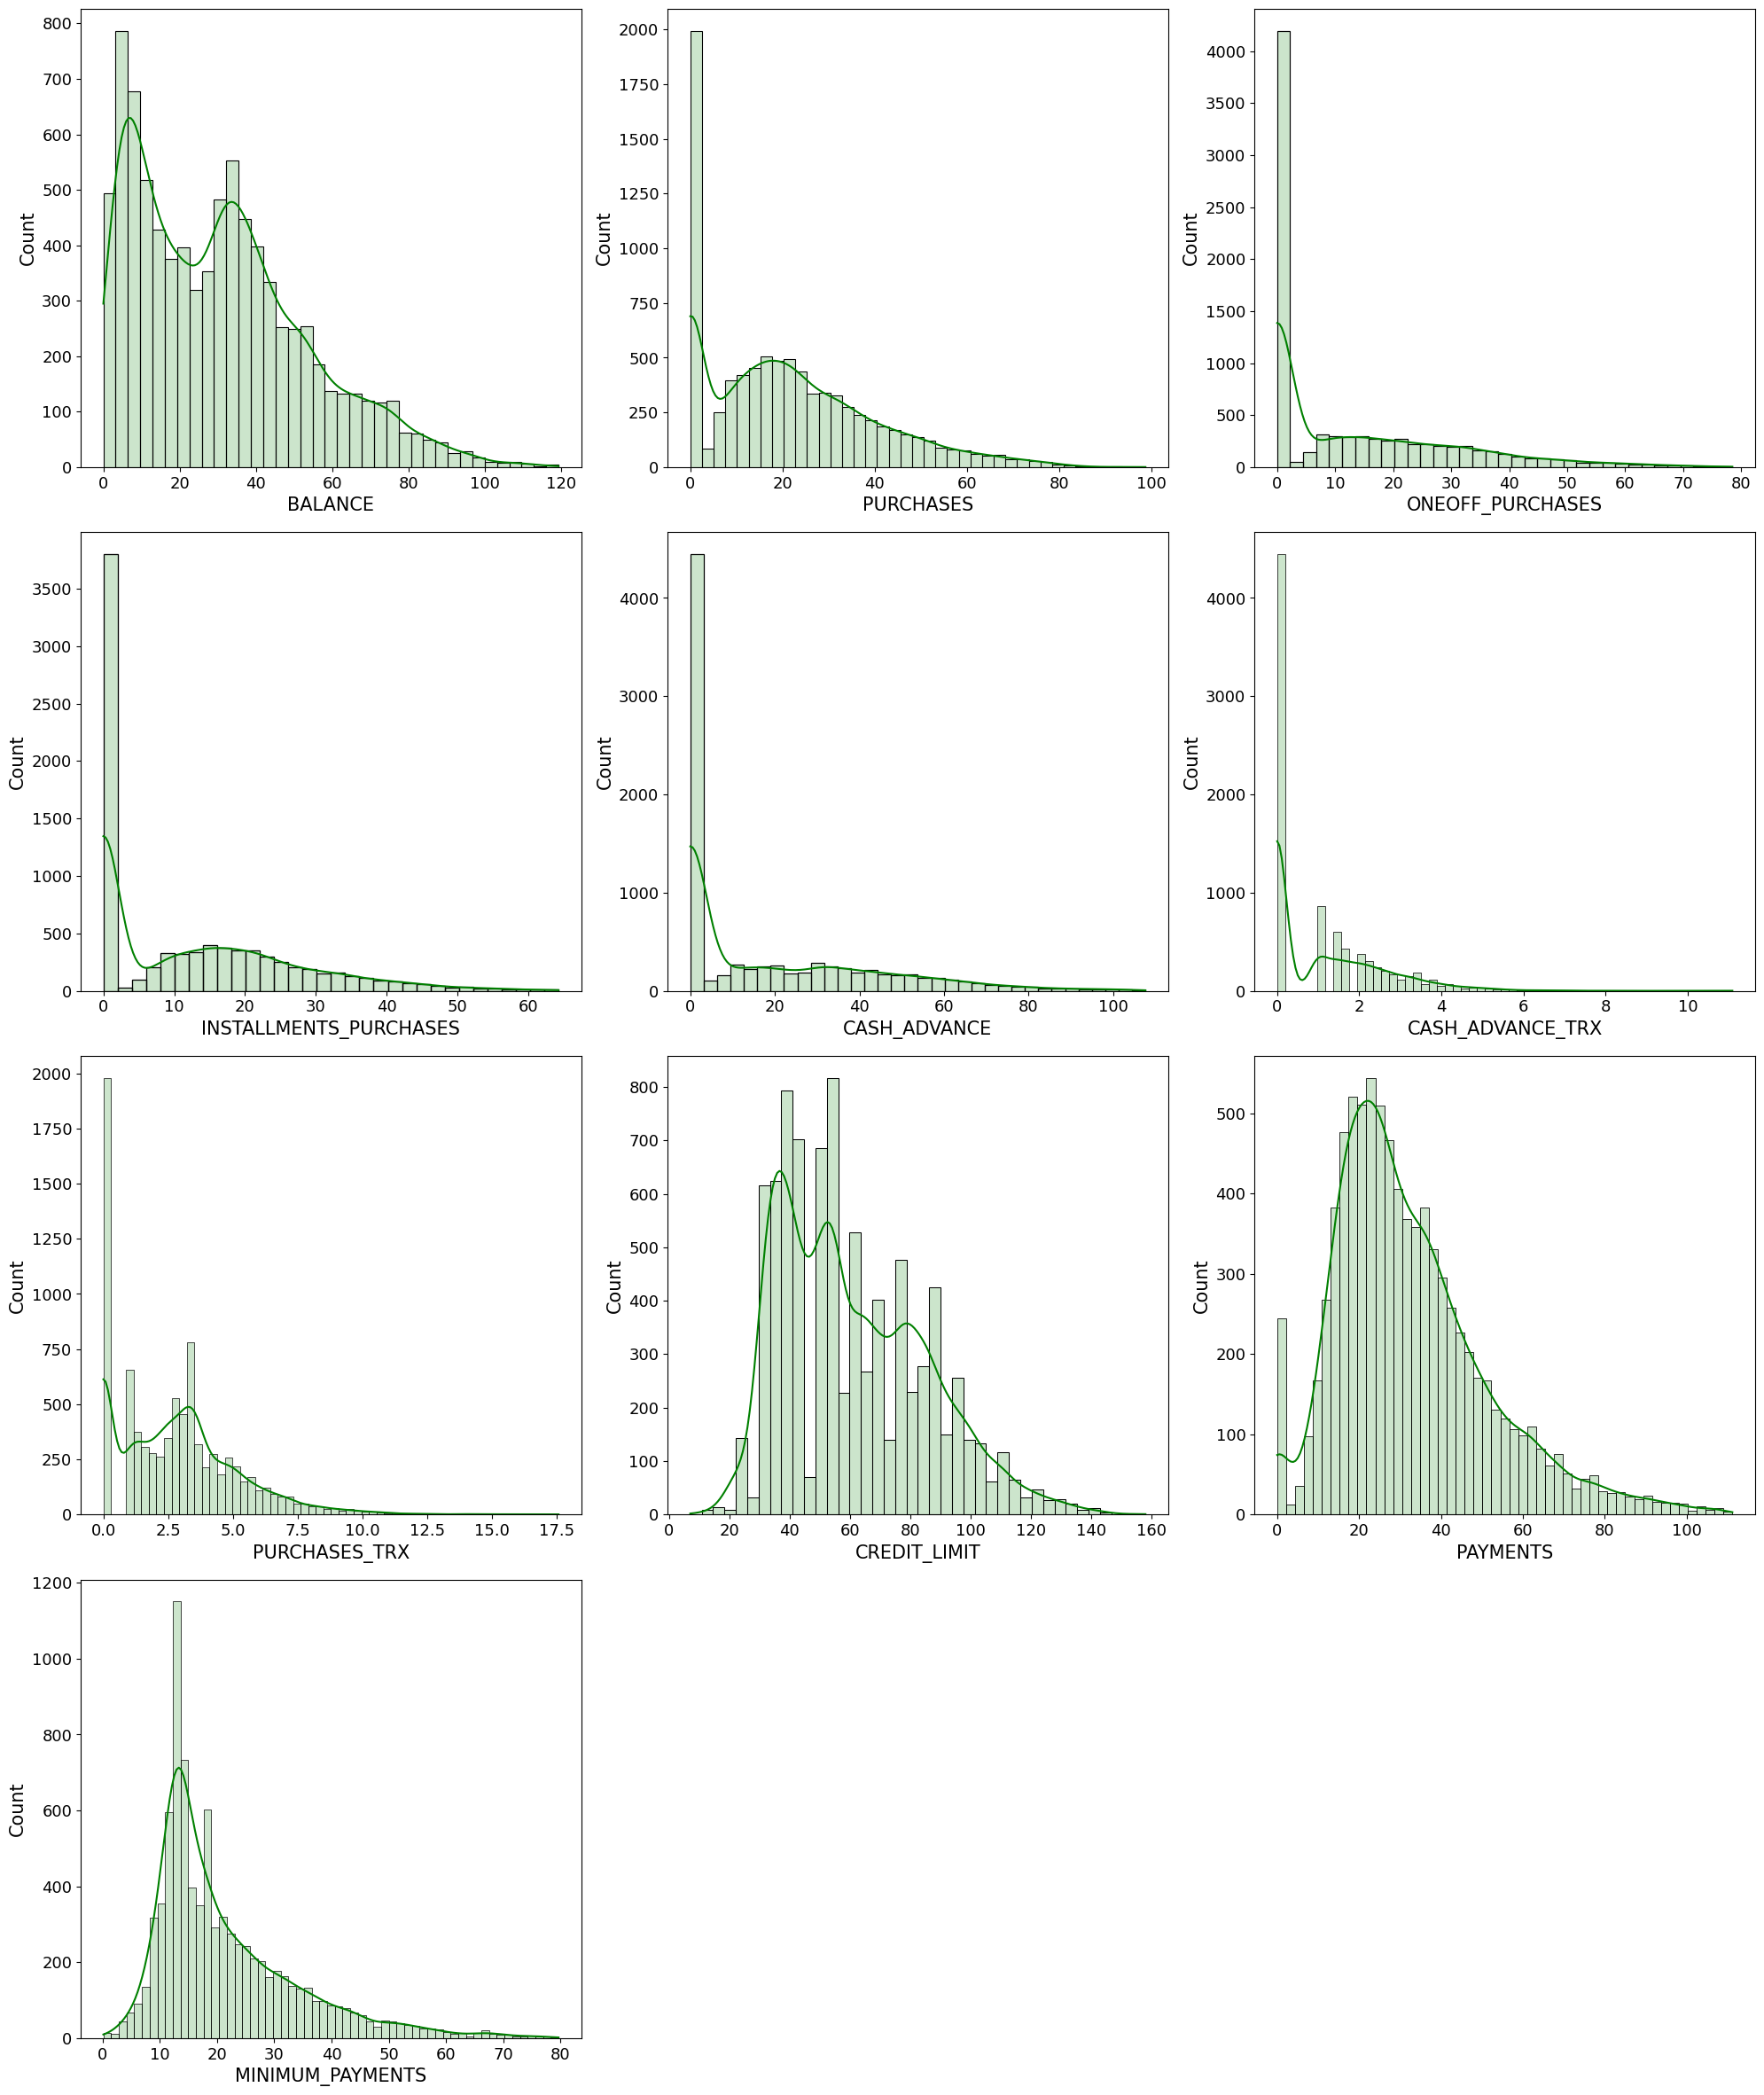

In [ ]:
# Let's check if the distibution of histogram is close to normal distribution.

fig = plt.figure(figsize = (20,35))
for i, col in enumerate(cols):
  ax = plt.subplot(6, 3, i+1)
  sns.histplot(data, x = col, ax = ax, color = 'green', kde = True, alpha = 0.2)
  plt.xlabel(col, fontsize = 15)
  plt.ylabel("Count", fontsize = 15)
  plt.xticks(fontsize = 13)
  plt.yticks(fontsize = 13)
plt.tight_layout()
fig.show()

We can see that there data is less right skwed

In [ ]:
# Normalized dataset

data.head(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,6.395369,0.818182,9.767292,0.000000,9.767292,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,1.414214,31.622777,14.205706,11.811426,0.000000,12
1,56.590347,0.909091,0.000000,0.000000,0.000000,80.267961,0.000000,0.000000,0.000000,0.250000,2.0,0.000000,83.666003,64.054919,32.746606,0.222222,12
2,49.951465,1.000000,27.805935,27.805935,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,3.464102,86.602540,24.941266,25.045654,0.000000,12
3,40.824877,0.636364,38.716921,38.716921,0.000000,14.345313,0.083333,0.083333,0.000000,0.083333,1.0,1.000000,86.602540,0.000000,17.673255,0.000000,12
4,28.595705,1.000000,4.000000,4.000000,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.000000,34.641016,26.044861,15.645806,0.000000,12


# Model Building

In [ ]:
# Importing relevant libraries

import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

## Reasons for Applying StandardScaler After Normalization
**Uniformity Across Features**: Even after normalization (such as square root transformation), features might operate on different scales. StandardScaler ensures that all features contribute equally to the distance computation, which is crucial for algorithms like K-means that rely on distance measures to form clusters.

**Optimization for Algorithms**: PCA performs better or converge faster when the data is on the same scale. PCA, for instance, is affected by the scale of the features since it looks for directions of maximizing variance. If one feature has a very large variance and others do not, PCA will be heavily biased towards those features with large variances.

**Enhanced Interpretability**: Standardizing the data after normalization can make the results more interpretable, especially in PCA, where you're looking at component weights to understand the importance of each feature in the components.

**Handling Residual Skewness**: Even after normalization, there might still be some residual skewness or discrepancies in the distribution of the features. Standardizing can help mitigate any remaining inconsistencies.

In [ ]:
# Applying standard scaler on normalized data

scaler = StandardScaler()
df_scaled = scaler.fit_transform(data)

In [ ]:
df_scaled = pd.DataFrame(data = df_scaled, columns = data.columns)
df_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-1.070430,-0.235873,-0.623615,-0.780651,-0.178406,-0.751979,-0.792582,-0.669094,-0.695904,-0.677752,-0.780373,-0.575038,-1.213933,-0.978534,-0.773934,-0.521366,0.365276
1,1.144433,0.144774,-1.152186,-0.780651,-0.880131,2.632498,-1.209674,-0.669094,-0.907119,0.594712,0.661792,-1.180016,0.933565,1.676057,0.907742,0.244650,0.365276
2,0.851491,0.525421,0.352570,0.880047,-0.880131,-0.751979,1.292869,2.776709,-0.907119,-0.677752,-0.780373,0.301872,1.054737,-0.406839,0.289142,-0.521366,0.365276
3,0.448779,-0.997167,0.943033,1.531702,-0.880131,-0.147113,-1.001129,-0.381945,-0.907119,-0.253599,-0.059290,-0.752232,1.054737,-1.735022,-0.303066,-0.521366,0.365276
4,-0.090836,0.525421,-0.935720,-0.541752,-0.880131,-0.751979,-1.001129,-0.381945,-0.907119,-0.677752,-0.780373,-0.752232,-1.089389,-0.348070,-0.465927,-0.521366,0.365276


# PCA (Principal Component Analysis) before Clustering

Using PCA before K-means can significantly improve the clustering process and outcomes by reducing dimensionality, mitigating noise, enhancing visualization capabilities, and ensuring that the data structure is more compatible with the assumptions of the K-means algorithm.

In [ ]:
# Applying PCA algorithm to df_scaled

pca = PCA()
X_pca = pca.fit_transform(df_scaled)
X_pca

array([[-8.84408897e-01, -2.58291234e+00,  1.42080116e-02, ...,
        -1.84873412e-01,  2.63240027e-02, -2.14364677e-02],
       [-3.16012769e+00,  2.06312121e+00,  1.20354999e-01, ...,
        -4.09740381e-01, -2.39199349e-01, -2.92759801e-02],
       [ 1.47385242e+00,  9.01386668e-01,  2.36936574e+00, ...,
        -1.14511221e-01,  5.89050987e-01, -1.87935431e-02],
       ...,
       [ 2.92067213e-01, -2.95878467e+00, -1.45593492e+00, ...,
         1.23103628e-01,  1.12029627e-01, -7.89765589e-02],
       [-2.43489711e+00, -3.00058396e+00, -1.47648002e-01, ...,
         3.88638947e-01, -1.61559304e-01,  2.56819443e-03],
       [ 1.99783779e-01, -7.45878137e-01,  1.52953261e+00, ...,
        -3.04769494e-01,  3.76482115e-01,  6.73271661e-02]])

In [ ]:
df_pca = pd.DataFrame(data = X_pca, columns = [f'PC{i+1}' for i in range(X_pca.shape[1])])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
0,-0.884409,-2.582912,0.014208,-0.873937,-0.250546,-0.393397,-0.485684,0.206300,0.318059,0.285878,-0.019101,0.448818,0.187896,0.150708,-0.184873,0.026324,-0.021436
1,-3.160128,2.063121,0.120355,0.272910,1.827957,-0.026223,0.687722,0.639026,0.295208,-0.812326,-1.025852,0.084934,0.020127,0.002356,-0.409740,-0.239199,-0.029276
2,1.473852,0.901387,2.369366,-1.269884,-1.095622,0.008143,0.749255,-1.131125,-0.596669,-1.311361,0.301084,0.421319,-0.125802,-0.630987,-0.114511,0.589051,-0.018794
3,-0.693234,-0.375301,2.016104,-0.636905,-0.151656,1.154944,-0.304995,-1.103627,-0.294993,1.789601,-0.683227,-0.822075,-0.110545,-0.413042,0.118006,0.108635,0.226912
4,-1.354953,-1.680659,0.504093,-1.372029,-0.396170,-0.780883,0.251185,0.560760,0.459549,-0.100811,0.081526,0.190919,-0.320460,0.115981,-0.049663,-0.064558,-0.018785


In [ ]:
evr = list(pca.explained_variance_ratio_)
evr = sorted(evr, reverse = True)

evr_cum = list(pca.explained_variance_ratio_.cumsum())

In [ ]:
# number of PCA components

num_components = [x+1 for x in range(X_pca.shape[1])]
num_components

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

**Cumulative Explained Variance**: 70-80% is often considered a good balance for retaining most of the important information in the data while achieving significant dimensionality reduction.

I will go with **5 components** based on the above information.

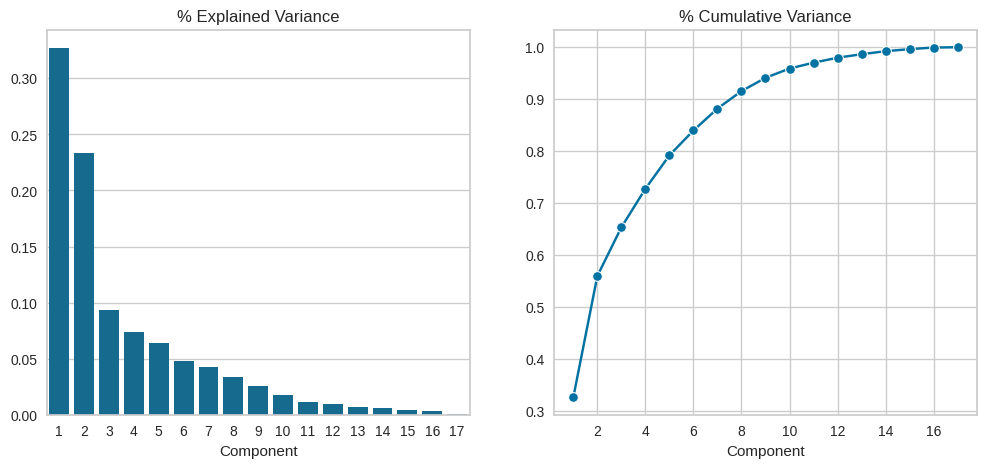

In [ ]:
# Finding the optimal number of PCA component that explains decent amount of information

fig, ax = plt.subplots(1, 2, figsize = (12, 5))

sns.barplot(x = num_components, y = evr, ax = ax[0])
ax[0].set_xlabel("Component")
ax[0].set_title("% Explained Variance")

sns.lineplot(x = num_components, y = evr_cum, marker = 'o' ,ax = ax[1])
ax[1].set_xlabel("Component")
ax[1].set_title("% Cumulative Variance")

fig.show()

In [ ]:
# Re-defining the pca model and applying to df_scaled

pca = PCA(n_components = 5)
X_pca = pca.fit_transform(df_scaled)

In [ ]:
df_pca = pd.DataFrame(data = X_pca, columns = [f'PC{i+1}' for i in range(X_pca.shape[1])])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5
0,-0.884409,-2.582912,0.014208,-0.873937,-0.250546
1,-3.160128,2.063121,0.120355,0.272911,1.827956
2,1.473852,0.901387,2.369365,-1.269887,-1.095620
3,-0.693234,-0.375301,2.016104,-0.636905,-0.151655
4,-1.354953,-1.680659,0.504093,-1.372029,-0.396170


# KMeans Clustering

**K-means clustering** is unsupervised machine learning algorithm used for partitioning a dataset into a predefined number of clusters.
The goal is to group data points that are similar to each other while minimizing the variance within each cluster.

Let's first investigate what is the optimal number of K by iterating the different k values from 1 to 10 in our model.

In [ ]:
kmeans_models = [KMeans(n_clusters = k, random_state = 42).fit(X_pca) for k in range(1,10)]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

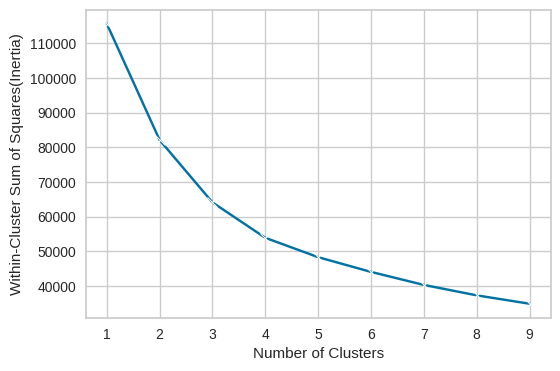

In [ ]:
inertias = [model.inertia_ for model in kmeans_models]

fig = plt.figure(figsize = (6,4))
sns.lineplot(x = list(range(1,10)), y = inertias, marker = 'x')
plt.xlabel("Number of Clusters")
plt.ylabel('Within-Cluster Sum of Squares(Inertia)')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

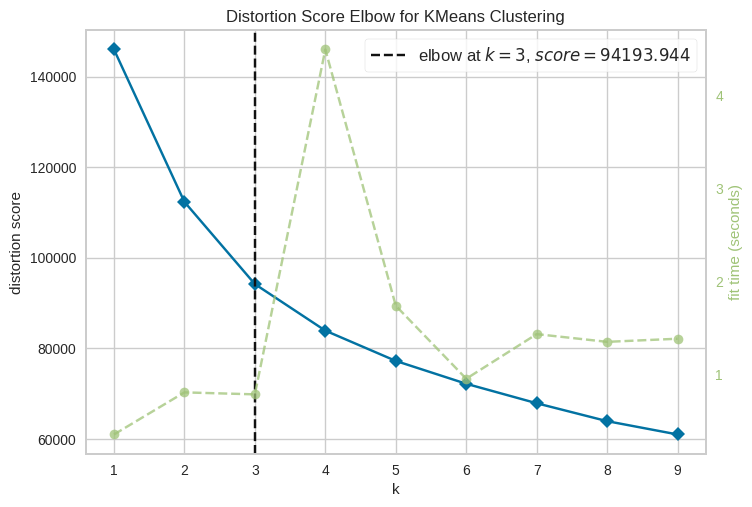

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
kmeans = KMeans()
vis_elbow = KElbowVisualizer(kmeans, k = (1, 10))
vis_elbow.fit(df_scaled)
vis_elbow.poof()

After the automated elbow method, it is concluded that k=3 is optimal number.


In [ ]:
# Applying K=3 to KMeans clustering using pca applied dataset

kmeans = KMeans(n_clusters = 3, random_state=0)

pca_labels = kmeans.fit_predict(X_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
pca_labels

array([1, 0, 2, ..., 1, 1, 1], dtype=int32)

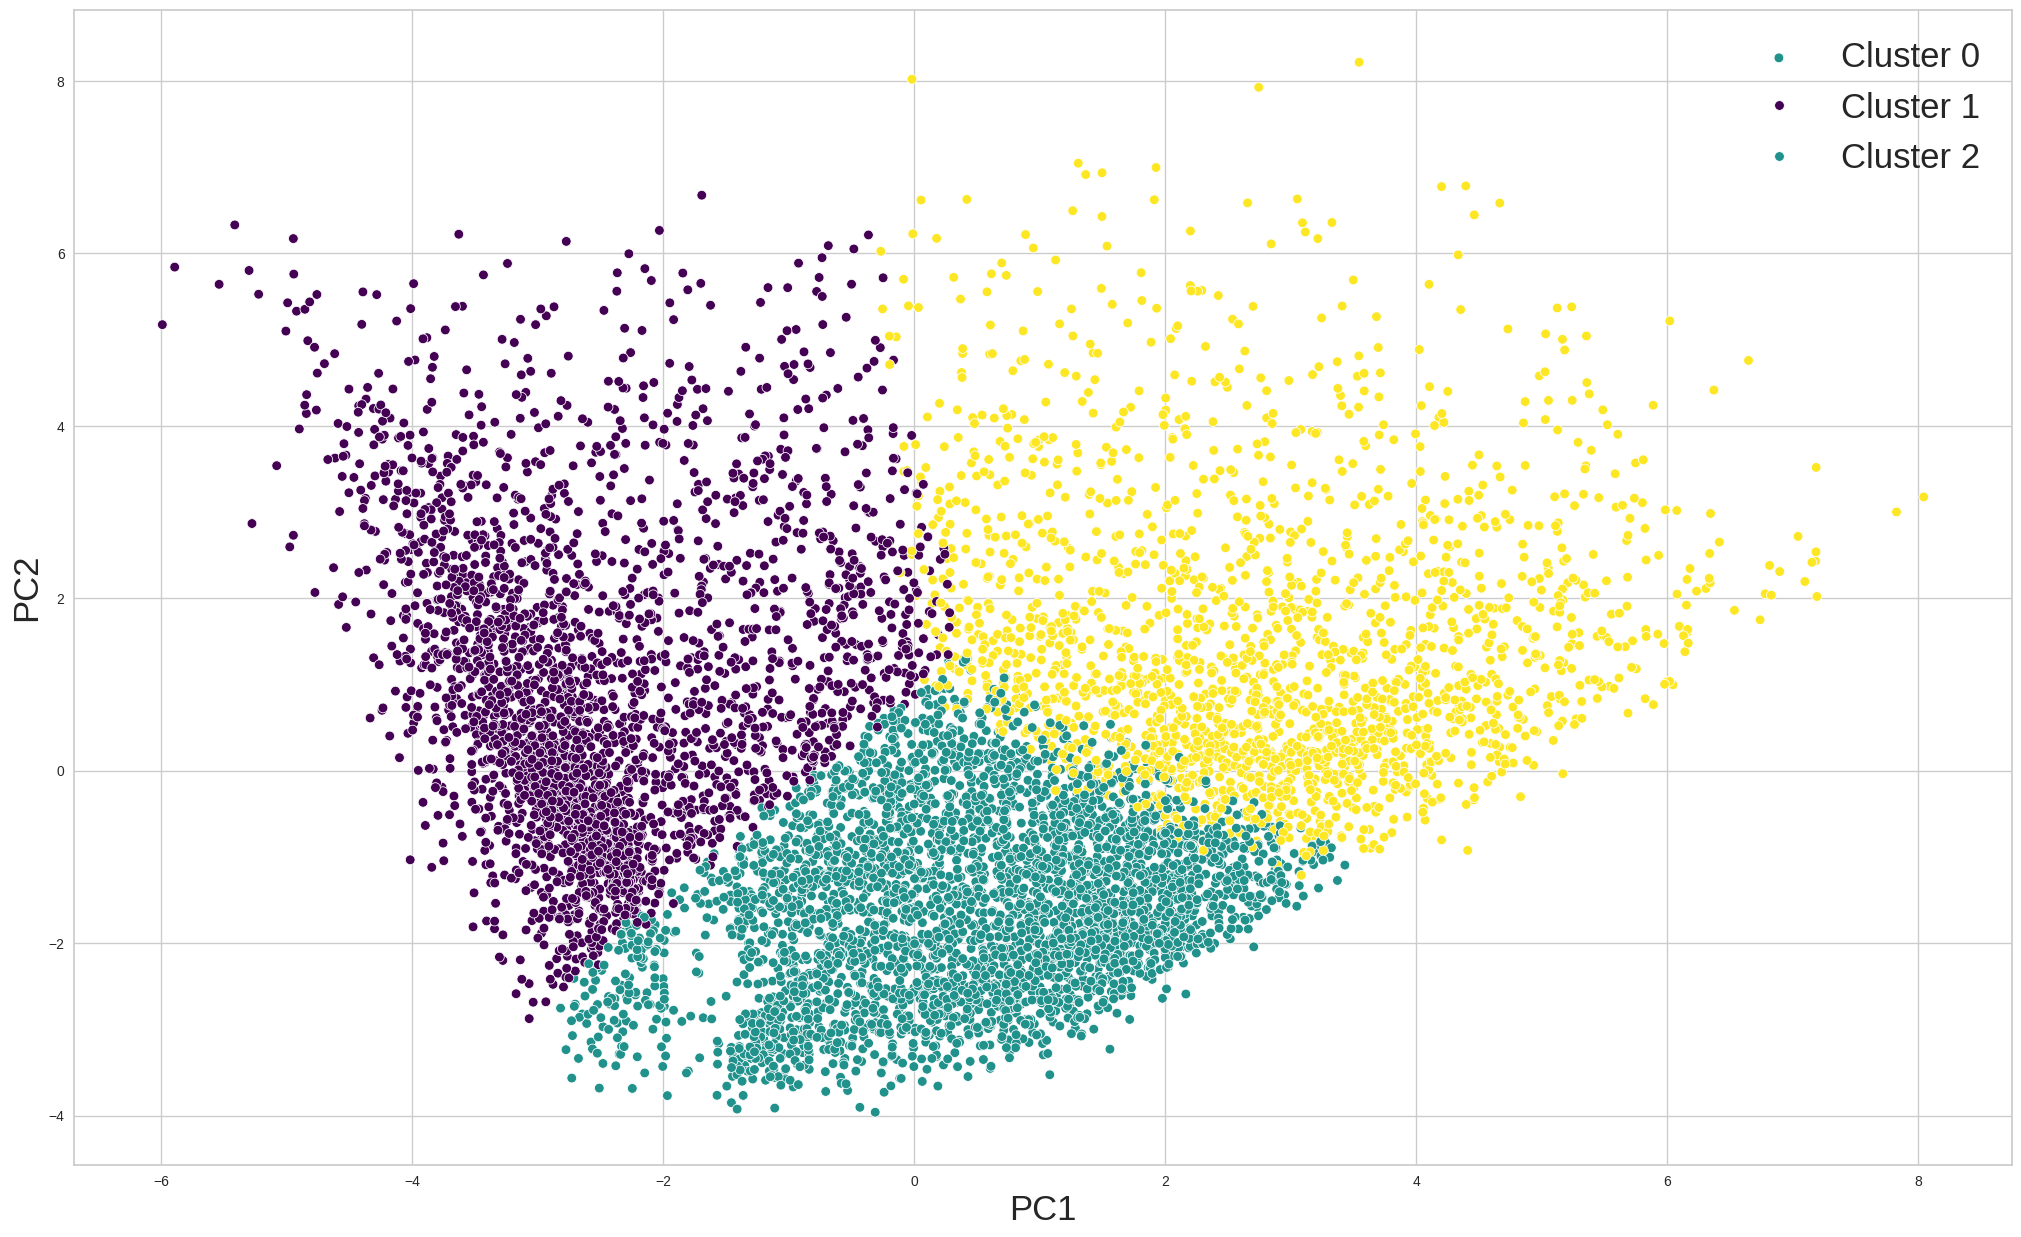

In [ ]:
# Checking the clustering result

plt.figure(figsize=(25,15))
sns.scatterplot(data = df_pca, x= "PC1", y= "PC2", hue = pca_labels, palette='viridis')
plt.xlabel("PC1", fontsize = 25)
plt.ylabel("PC2", fontsize = 25)
plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2'],fontsize = 25)

plt.show()

In [ ]:
# reverting the feature values by squaring the values

def feature_engg(column):
    column = np.square(column)
    return column

for col in cols:
    data[col] = data[col].apply(feature_engg)

In [ ]:
data['cluster'] = pca_labels
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,312.343947,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12,1


# Cluster Analysis

<ipython-input-41-c85ed4a362b9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='cluster', data=data, palette=palette, label='Count')
<ipython-input-41-c85ed4a362b9>:6: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  ax = sns.countplot(x='cluster', data=data, palette=palette, label='Count')


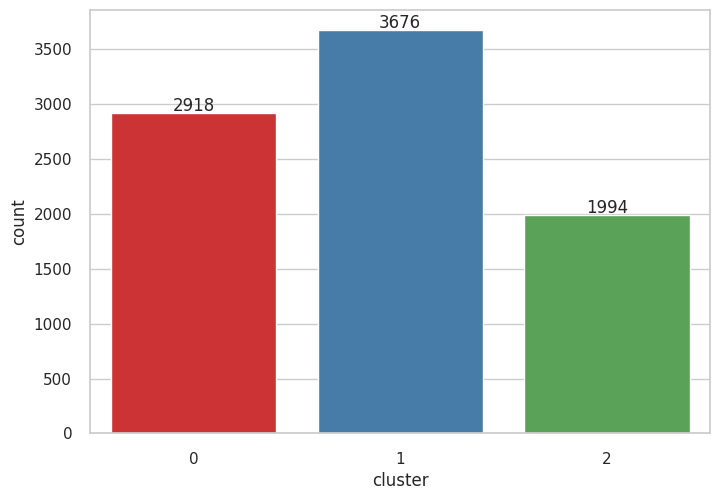

In [ ]:
# Checking the count of each cluster data points

sns.set(style="whitegrid")
palette = sns.color_palette("Set1")

ax = sns.countplot(x='cluster', data=data, palette=palette, label='Count')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',
                xytext=(0, 5), textcoords='offset points')

plt.show()

In [ ]:
df_cols=data.columns
df_cols.tolist()

['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE',
 'cluster']

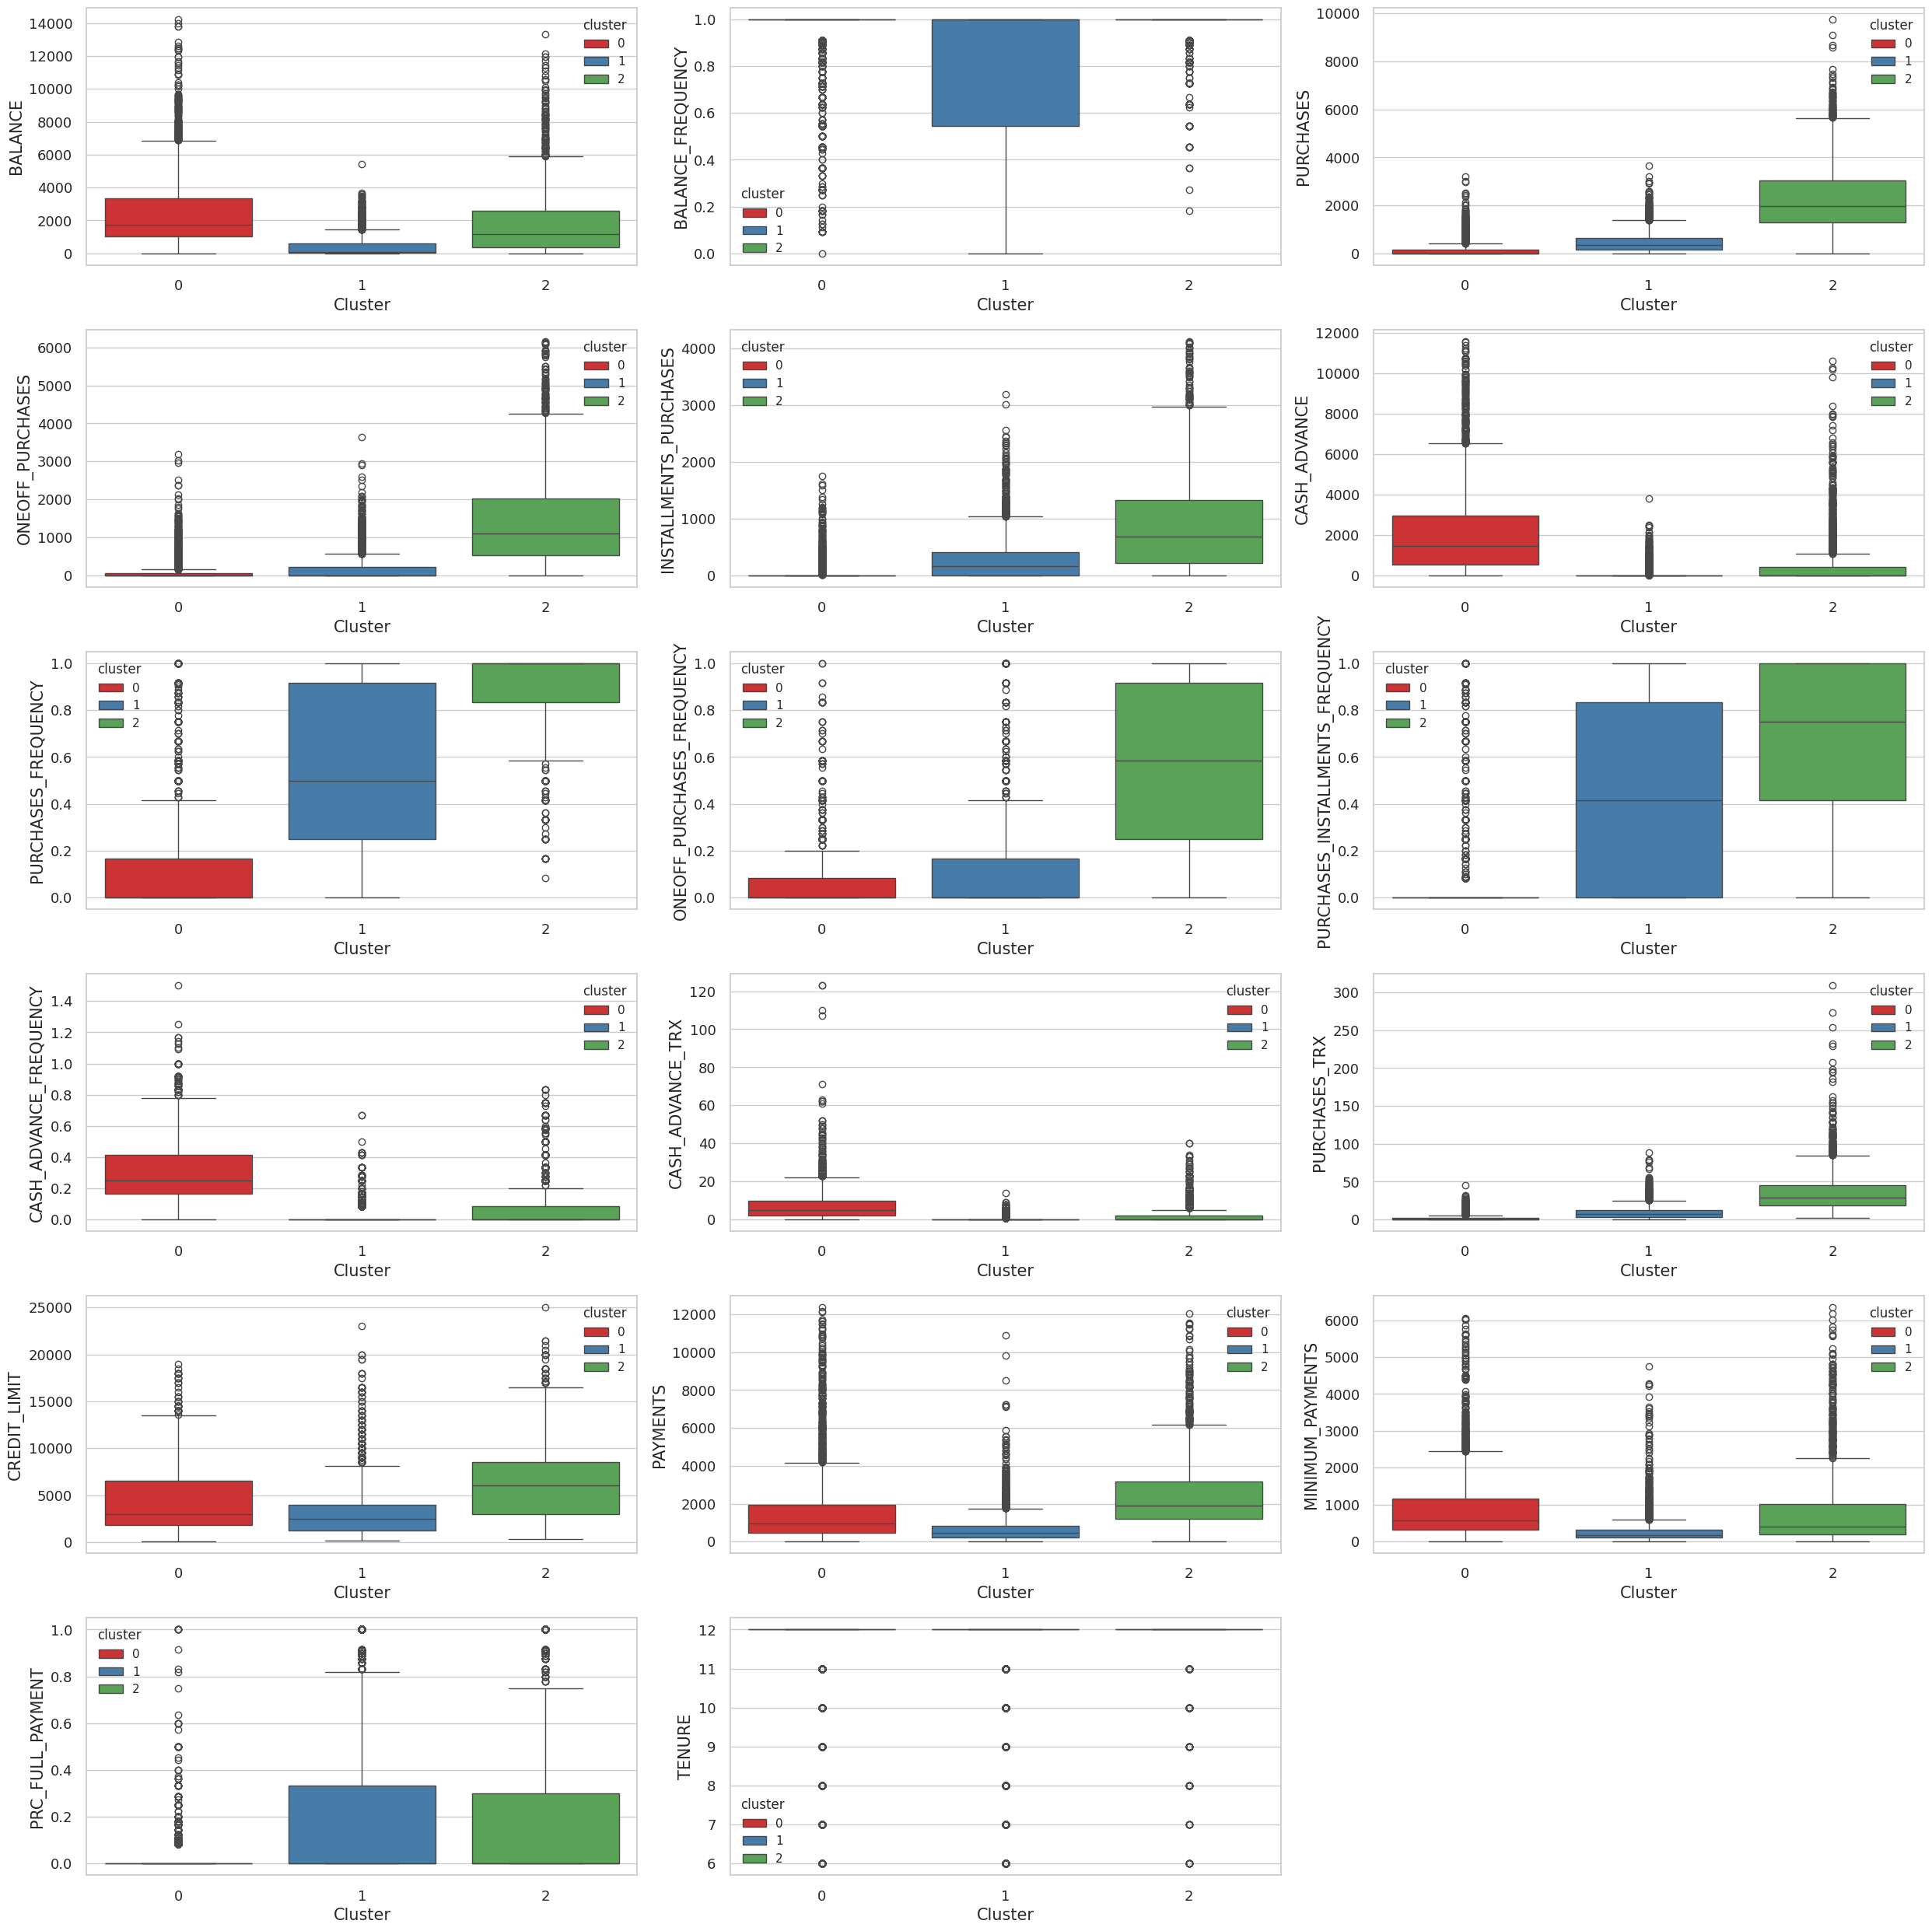

In [ ]:
# Box plot results for each cluster by feature

plt.figure(figsize = (25, 25))
for i, col in enumerate(df_cols):
  if i+1 < len(df_cols):
    ax = plt.subplot(6,3, i+1)
    sns.boxplot(x = data['cluster'], y = data[col],hue=data['cluster'], palette='Set1')
    plt.xlabel("Cluster", fontsize = 15)
    plt.ylabel(col, fontsize = 15)
    plt.xticks(fontsize = 13)
    plt.yticks(fontsize = 13)


plt.tight_layout()
plt.show()

In [ ]:
data.groupby('cluster').mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
cluster,,,,,,,,,,,,,,,,,
0,2502.348932,0.932451,155.928321,108.609246,47.353917,2122.655096,0.129242,0.059259,0.069822,0.308842,7.384510,2.252228,4462.515837,1634.135532,899.857510,0.028571,11.350240
1,398.726936,0.772527,470.438455,188.414470,282.531793,72.399764,0.542833,0.105291,0.431001,0.020301,0.318009,8.952122,3159.419233,675.967363,282.028809,0.217040,11.443961
2,1862.218821,0.977749,2327.537823,1436.964378,890.621720,552.651123,0.892010,0.555477,0.644687,0.084117,1.934804,36.507021,6222.533510,2453.126828,811.614357,0.209486,11.847543


# **Cluster 0 - Cash Advancment Reliant Users**

#### These customers maintain a high balance, yet don't seem to make many purchases. Most of their balance appears to stem from cash advances, as evidenced by their highest rate in cash advance transactions, frequency, and the amount spent on them. Considering their lowest rate of full payment among all three clusters, it suggests they may not be fully committed to or capable of paying off their balances.
* High Balance
* Frequently update their balance
* Spend least money on purchases, one-off, installment purchases
* Get the most amount, the most frequent, and the most transactions of cash advancement
* Least purchase frequency on all 3 and least purchase transaction
* Moderate credit limit, moderate payments
* Maximum minimum payments
* Notably lowest for the percent of full payment

## **[To target these customers]**

#### Offering Installment Benefits: As these customers prefer cash services over purchases, incentivizing purchases through installment benefits can be effective. Card companies can enhance benefits for installment payments to encourage these customers to use their cards for purchases.

#### Providing Financial Education and Management Services: Since these customers may face difficulties in repaying credit card balances, providing financial education and management services can help address their financial issues. Additionally, offering balance management tools can support effective balance management and debt reduction.

# **Cluster 1 - Moderate Spenders**
#### These customers use credit cards a moderate amount, yet, with a low balance. They can be students or young professionals who have limited financial resources and may use credit cards cautiously. They may not update their balances frequently and tend to make moderate purchases without excessive spending. Or may include cards that are used as a second card. They may spend less money using the card, but they do so frequently, and the percentage of making a full payment is about 20%.
* Low Balance
* Balance is updated less frequently
* purchases, one-off, installment purchases all consists a moderate amount
* least spent on and least frequent in cash advance
* moderate frequency of purchases, including one-off and installment purchases
* moderate purchase transaction
* lowest payments, minimum payments
* The percentage of full payment is relatively high compared to cluster 0, but still low with below 20%

##**[To target these customers]**

####Highlighting savings and economic benefits can be effective for this segment, as they typically have low balances and limited financial resources. Offering promotions, discounts, and benefits for affordable products and services can emphasize the value of their purchases.

####Additionally, since this segment may not frequently update their balances and manage their spending carefully, offering practical and valuable additional services can enhance customer value. This could include budgeting tools or financial advisory services.

#### We can also offer them discounts on everyday expenses, such as coffee, meals, and educational-related fees.

# **Cluster 2 - Heavy Credit Card Users**
#### These customers utilize credit cards frequently, making both big amount of installment and one-time payments. They not only use credit cards extensively but also manage payments effectively, shown by a realtively high percentage of making a full payment. This segment demonstrates financial stability and possesses the capability to make substantial purchases.
* Moderate to high balance
* Frequently update their balance
* Highest purchase, including highest one-off and installment purchases
* Noticeably the highest in purchase, one-off, and installment purchase frequency
* Lower cash advance frequency, the amount spent on cash advance, and the transaction
* Highest purchase transactions
* Highest credit limit
* Highest payments, and a little lower than the cluster1 on minimum payments
* The percentage of full payment is relatively high compared to cluster 0, but still low with below 20%

##**[To target these customers]**

#### Consequently, there is an anticipation of high demand for shopping and consumption-related products and services within this segment. Promoting them with discounts or giving points through partnerships with major department stores or electronics retailers can be effective. We can also offer them an interest-free installment plans for larger purchases.